
Tasks:

1. Sample estimation of PDF (histogram, kernel density estimation)

2. Theoretical distributions PDFs

3. Distribution parameters estimation (graphical method)

4. Biplots (QQ and PP)

5. Statistical hypothesis checking (Kolmogorov Smirnov test, Pearsons chi-squared test, omega-squared test)


Potential distributions:

Weibull distribution (2 parameters) x

Rician distribution (2 parameters) x

Students distribution (1 parameter) x

Rayleigh distribution (1 parameter) x

T location-scale distribution (3 parameters) ?

Noncentral chi-square distribution (2 parameters) ?

Noncentral F distribution (3 parameters) x

Nakagami distribution (2 parameters) x

Loglogistic distribution (2 parameters) ?

Logistic distribution (2 parameters) x

Beta distribution (2 parameters) x

Generalized extreme values distribution (2 parameters) ?

Gamma distribution (2 parameters) x

Lognormal distribution (2 parameters) x

Normal distribution (2 parameters) x



In [3]:
import numpy as np

# load data
sample = np.loadtxt('sample_14.txt')
sample.__sizeof__()

8096

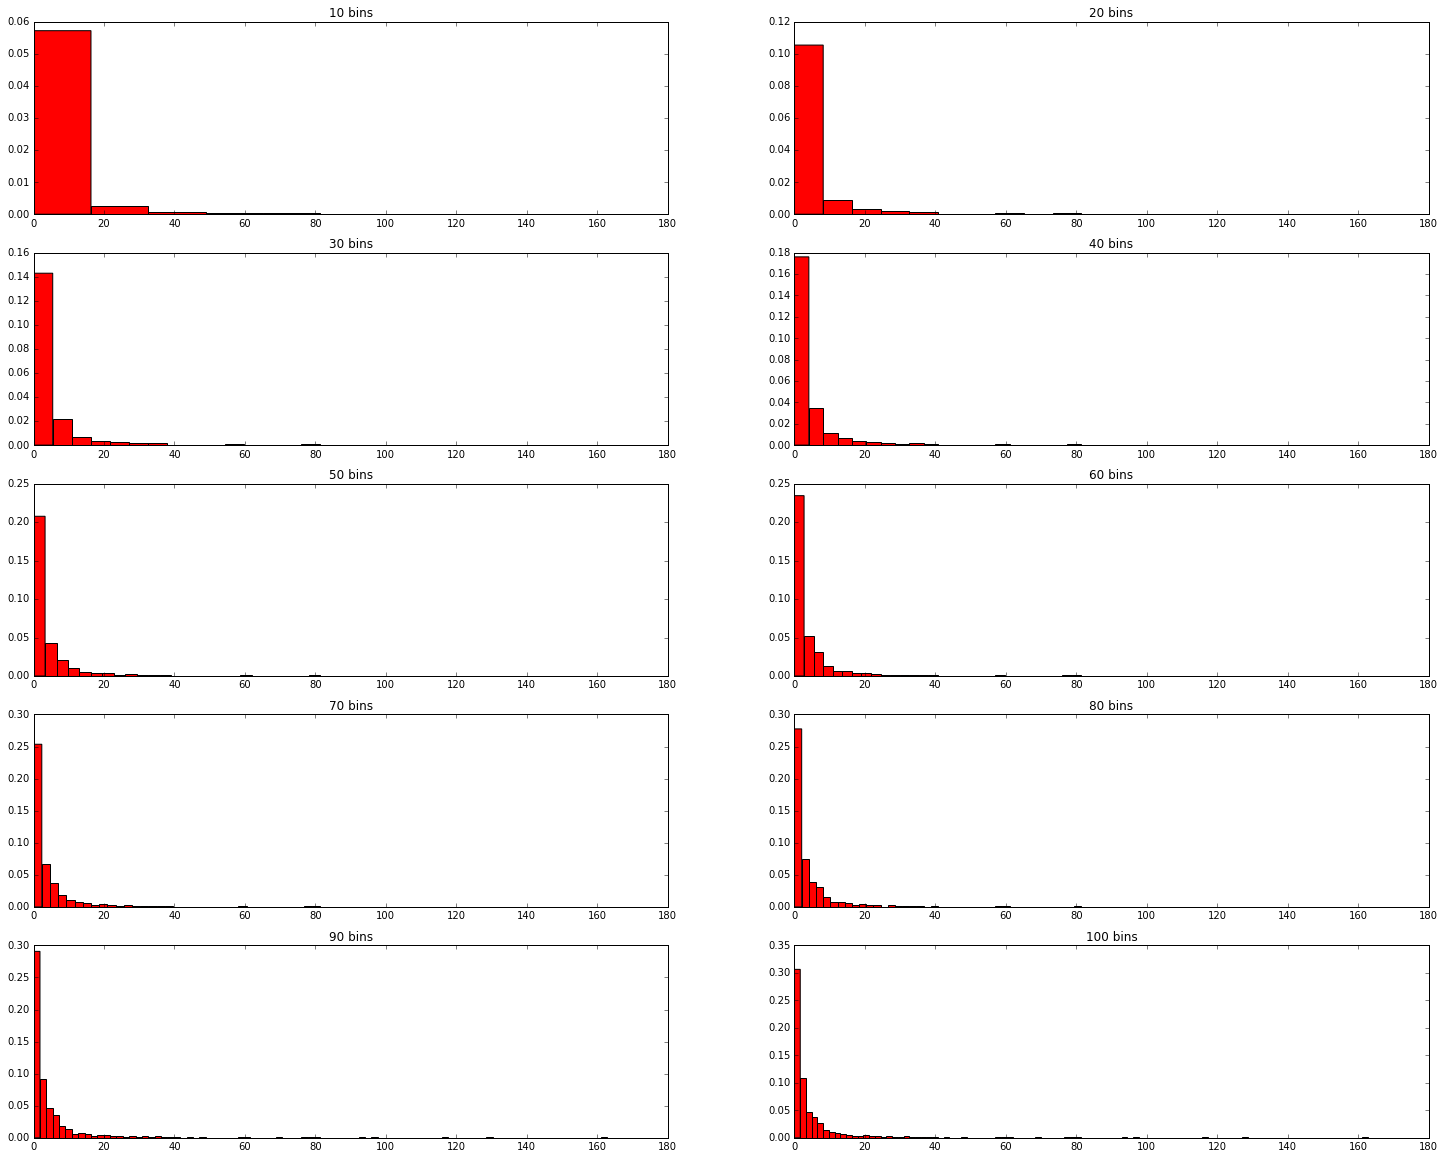

In [4]:
# plotting histogram
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(1, figsize=(25, 20))
for i in range(1, 11):
    bins = i * 10
    plt.subplot(5, 2, i)
    plt.hist(sample, fc='red', bins=bins, normed=True)
    plt.title(str(bins) + ' bins')
plt.show()

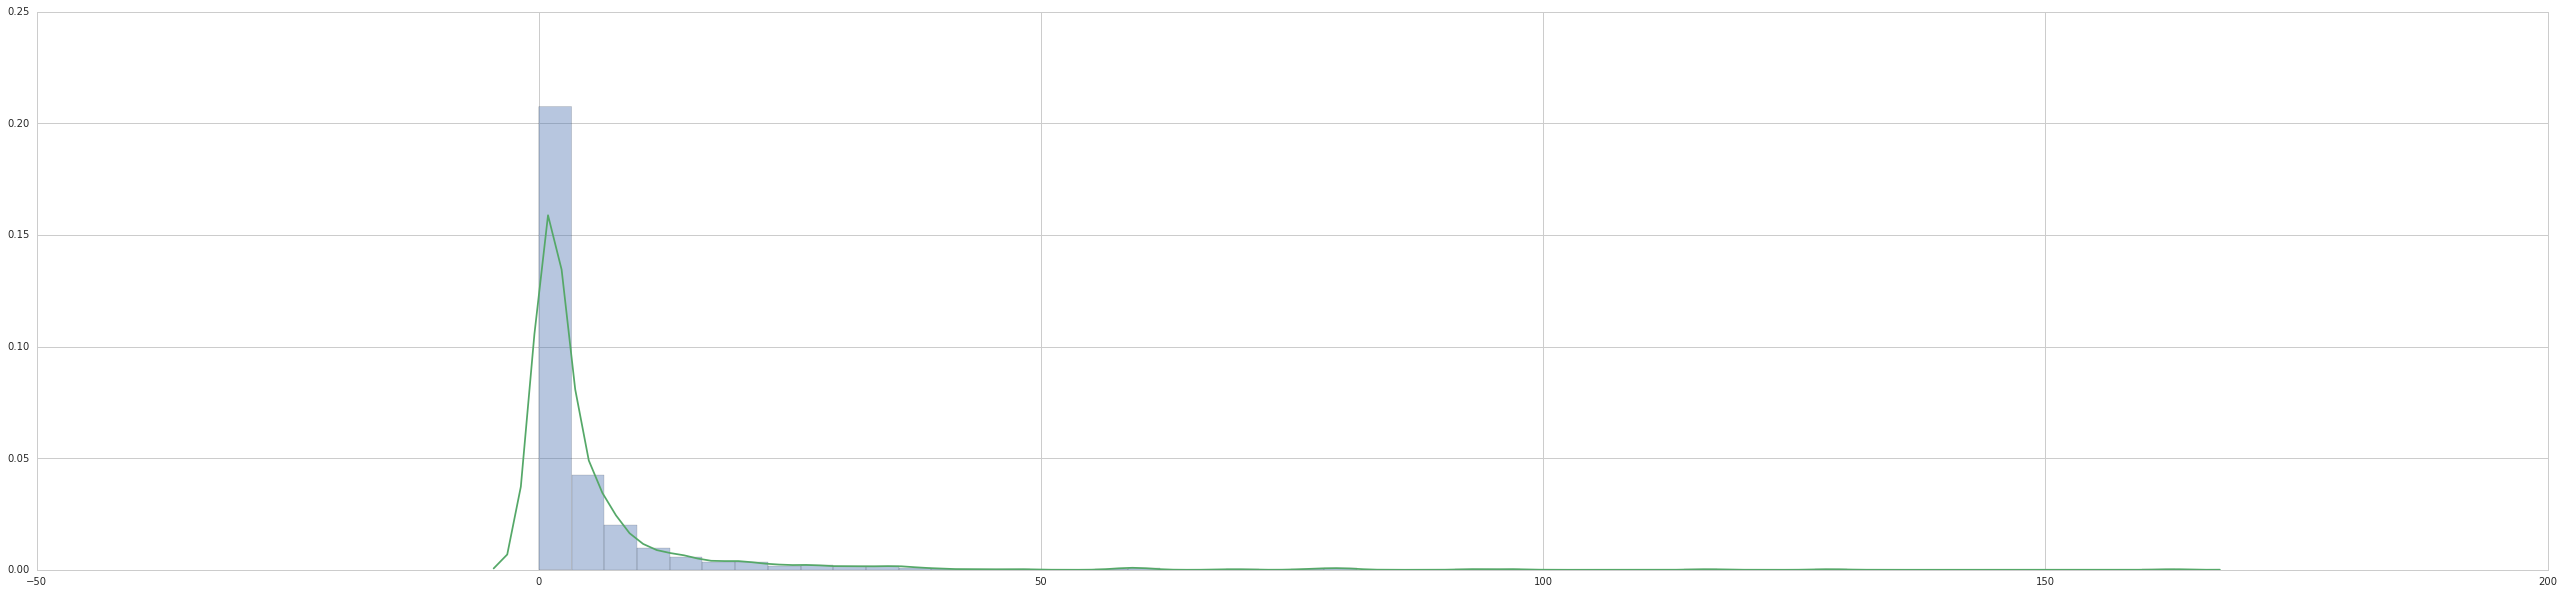

In [5]:
import seaborn as sns
sns.set_style('whitegrid')

plt.figure(figsize=(45,10))
sns.distplot(sample,kde=False,norm_hist=True)
sns.kdeplot(sample,bw=1.5)

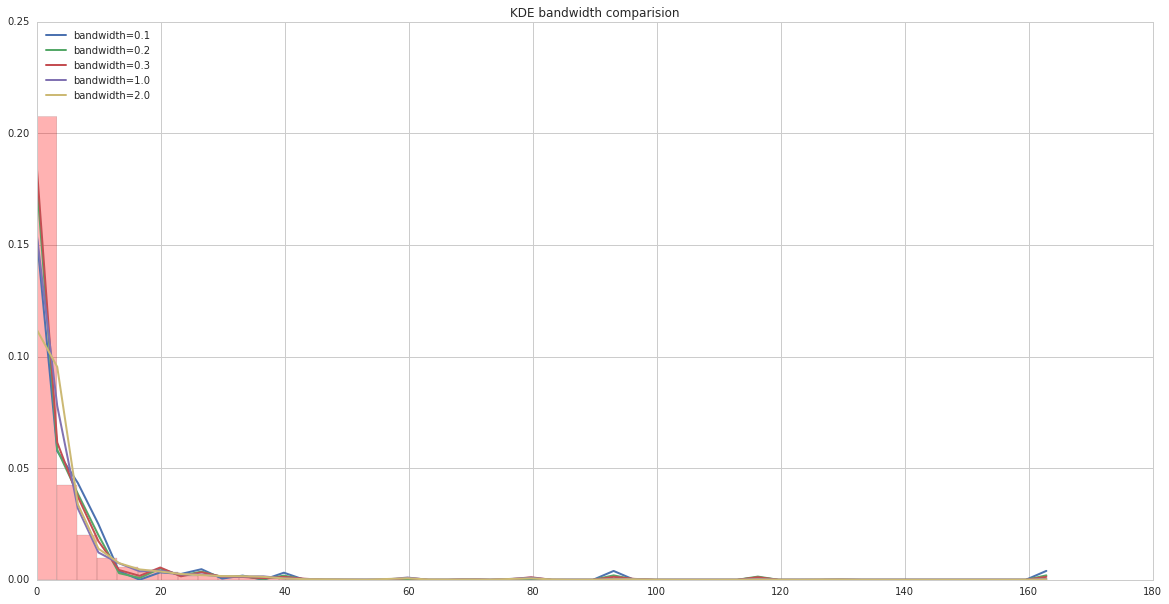

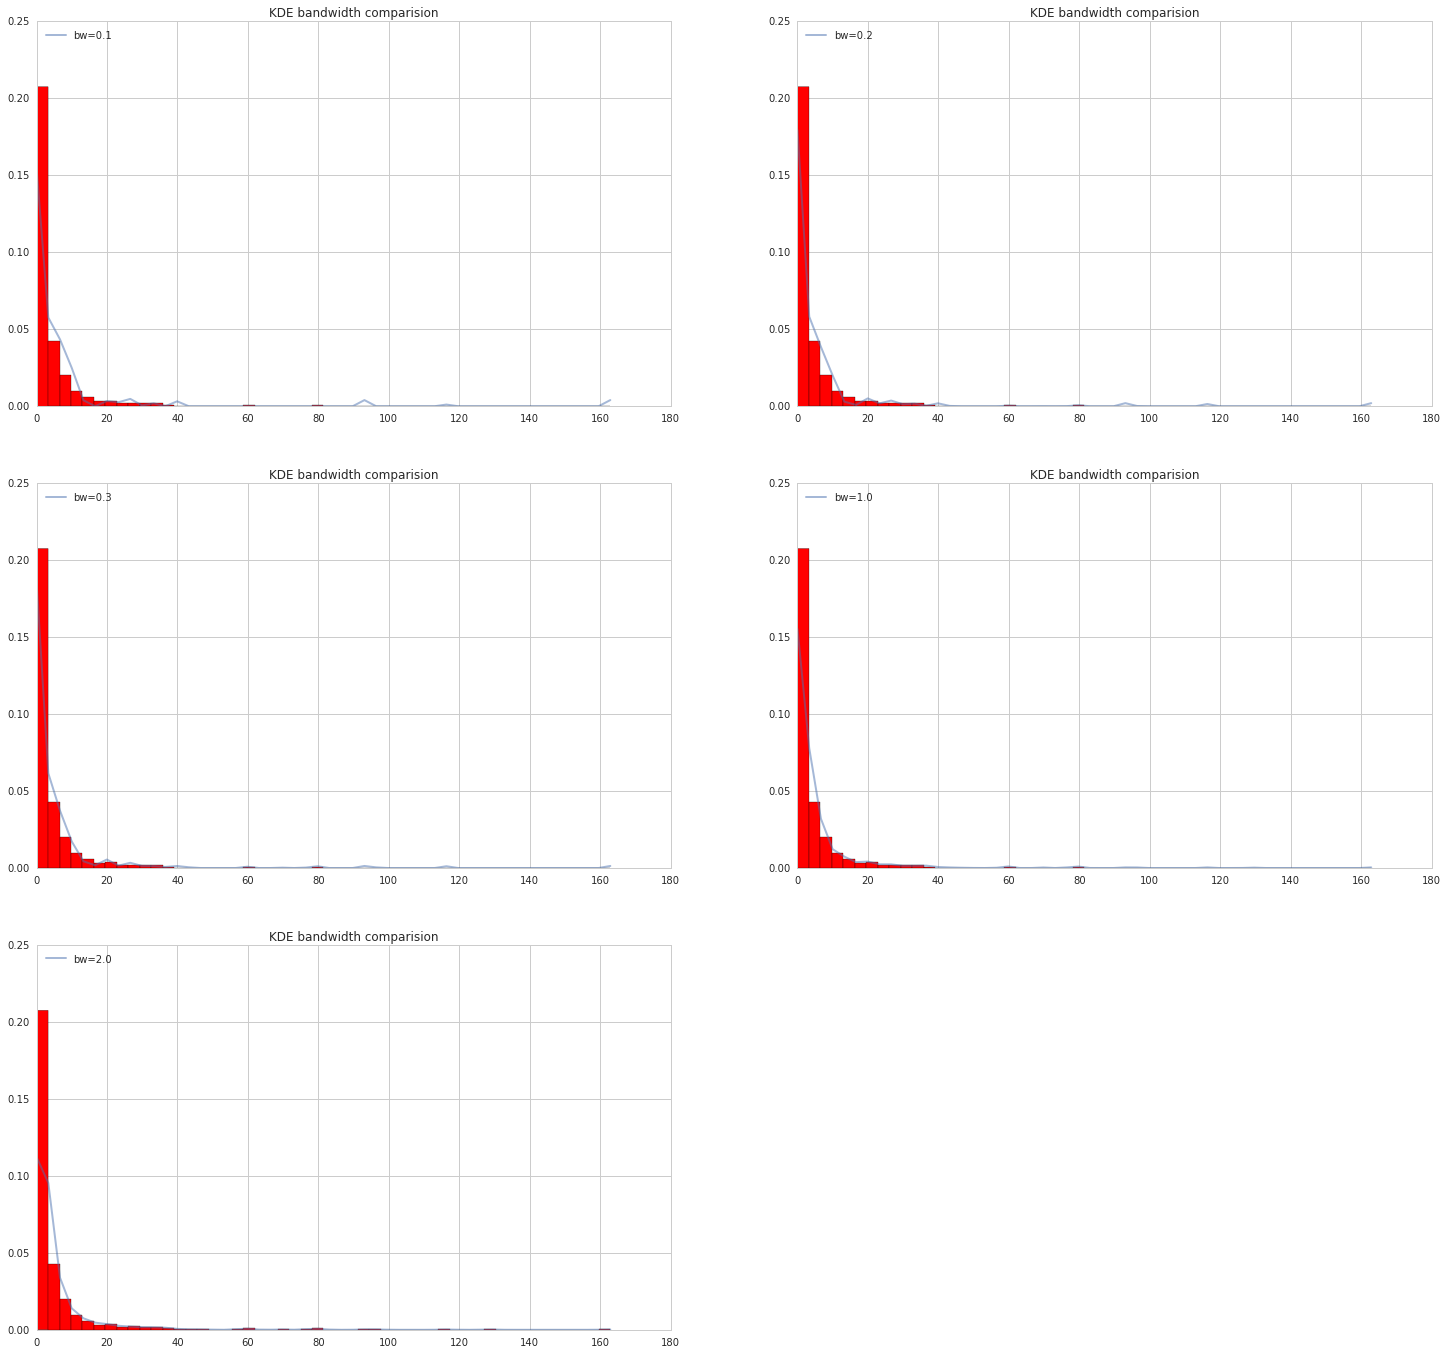

In [7]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    from sklearn.neighbors import KernelDensity
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


x_grid = np.linspace(sample.min(), sample.max())

fig = plt.figure(3, figsize=(20, 10))
ax = fig.add_subplot(111)

bandwidths = [0.1, 0.2, 0.3, 1.0, 2.0]

for bandwidth in bandwidths:
    ax.plot(x_grid, kde_sklearn(sample, x_grid, bandwidth=bandwidth), label='bandwidth={0}'.format(bandwidth), linewidth=2)
ax.hist(sample, 50, fc='red', alpha=0.3, normed=True)
ax.legend(loc='upper left')
plt.title('KDE bandwidth comparision')
plt.show()


fig = plt.figure(4, figsize=(25, 40))
i = 1
for bandwidth in bandwidths:
    plt.subplot(5, 2, i)
    plt.plot(x_grid, kde_sklearn(sample, x_grid, bandwidth=bandwidth), label='bw={0}'.format(bandwidth), linewidth=2, alpha=0.5)
    plt.hist(sample, 50, fc='red', normed=True)
    plt.legend(loc='upper left')
    plt.title('KDE bandwidth comparision')
    i += 1

plt.show()

C:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


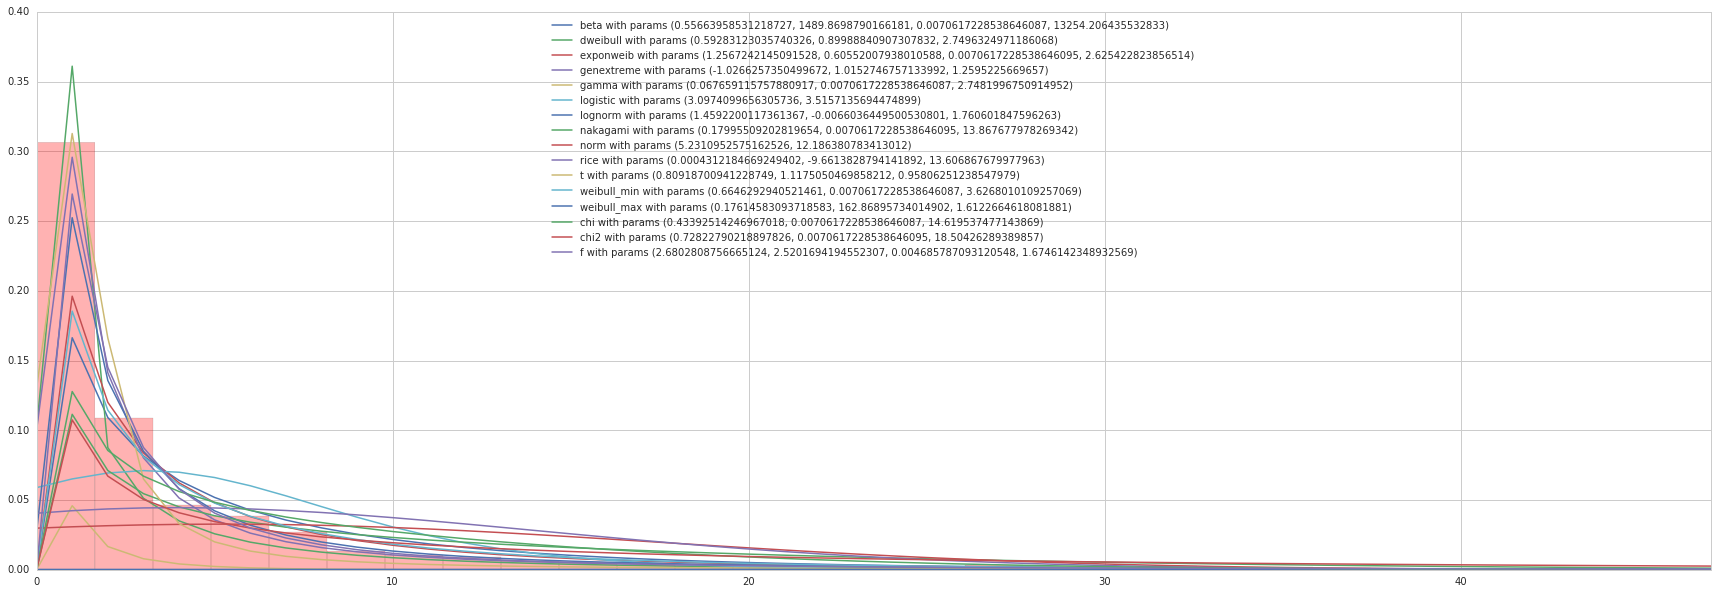

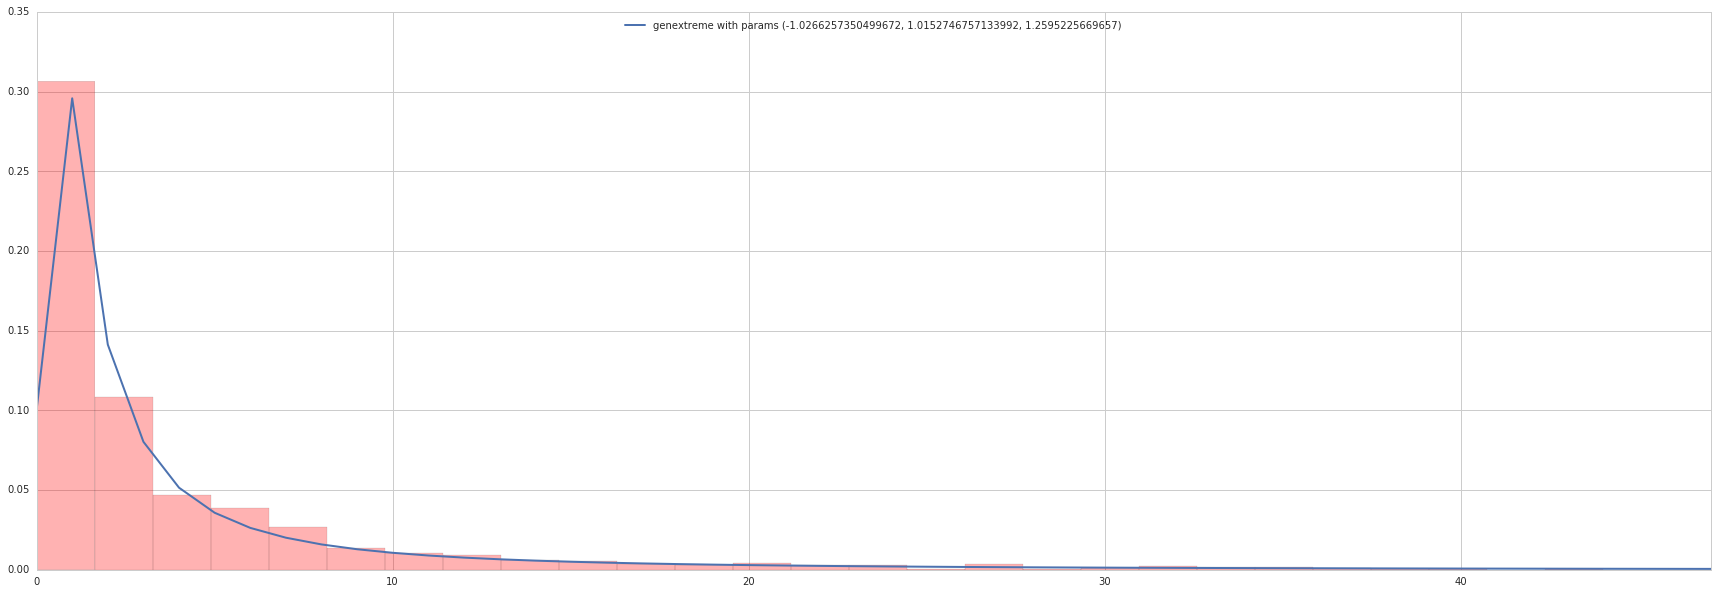

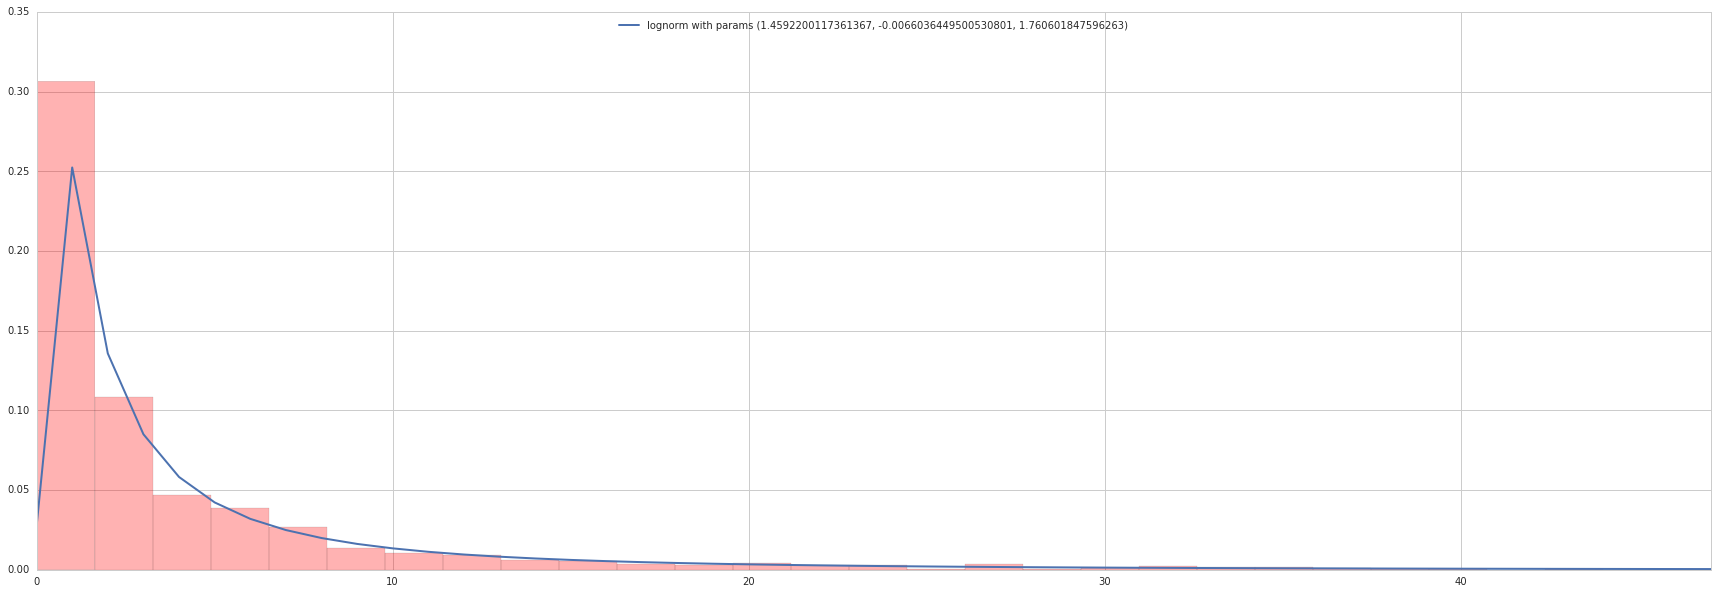

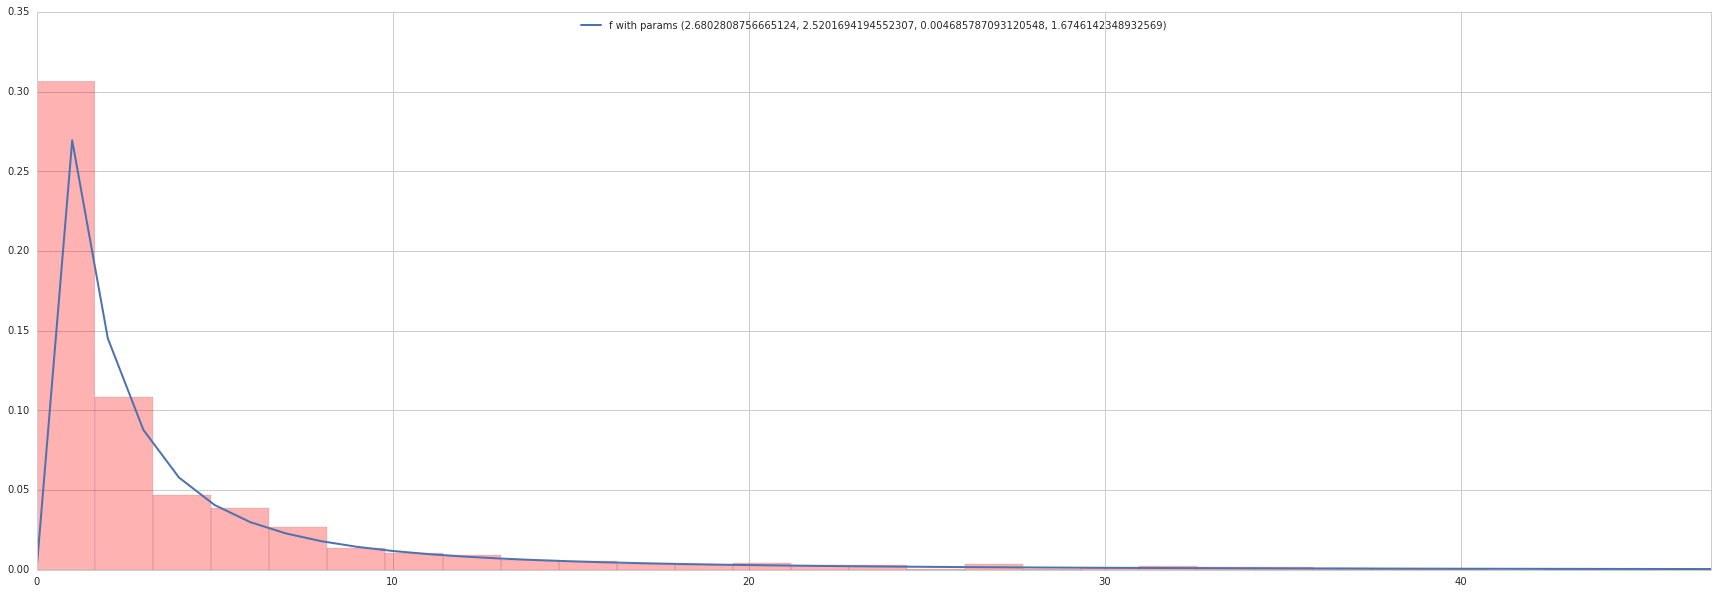

In [8]:
# plotting distributions
import matplotlib.pyplot as plt
import scipy.stats

plt.figure(5, figsize=(30, 10))
h = plt.hist(sample, bins=100, color='w', fc='red',alpha=0.3, normed=True)

dist_names = ['beta', 'dweibull', 'exponweib', 'genextreme', 'gamma', 'logistic', 'lognorm', 'nakagami', 'norm', 'rice', 't', 'weibull_min', 'weibull_max', 'chi', 'chi2','f']


for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(sample)
    pdf_fitted = dist.pdf(scipy.arange(8096), *param[:-2], loc=param[-2], scale=param[-1])
    plt.plot(pdf_fitted, label="{} with params {}".format(dist_name, param), linewidth=1.5)
    plt.xlim(0,47)
    plt.legend(loc='upper center')
plt.show()


import matplotlib.pyplot as plt
import scipy.stats



dist_names = [ 'genextreme', 'lognorm', 'f']


for dist_name in dist_names:
    plt.figure(5, figsize=(30, 10))
    plt.hist(sample, bins=100, color='w', fc='red', alpha=0.3, normed=True)

    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(sample)
    pdf_fitted = dist.pdf(scipy.arange(8096), *param[:-2], loc=param[-2], scale=param[-1])
    plt.plot(pdf_fitted, label="{} with params {}".format(dist_name, param), linewidth=2.0)
    plt.xlim(0,47)
    plt.legend(loc='upper center')
    plt.show()

(-1.0266257350499672, 1.0152746757133992, 1.2595225669657)


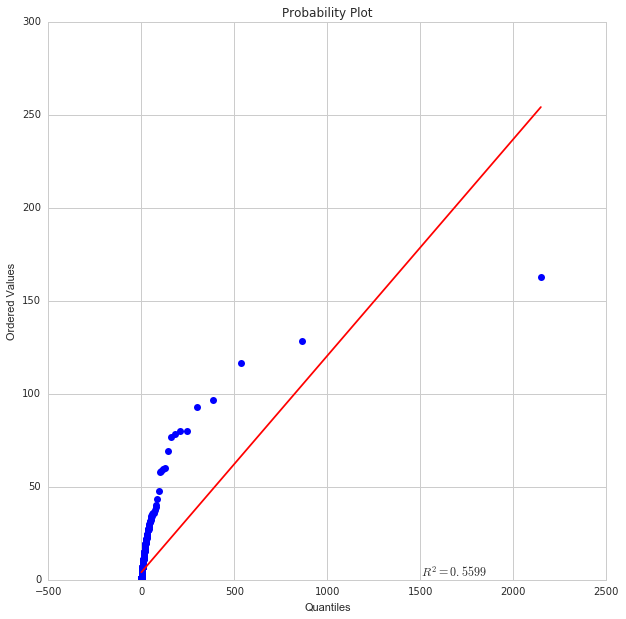

(1.4592200117361367, -0.0066036449500530801, 1.760601847596263)


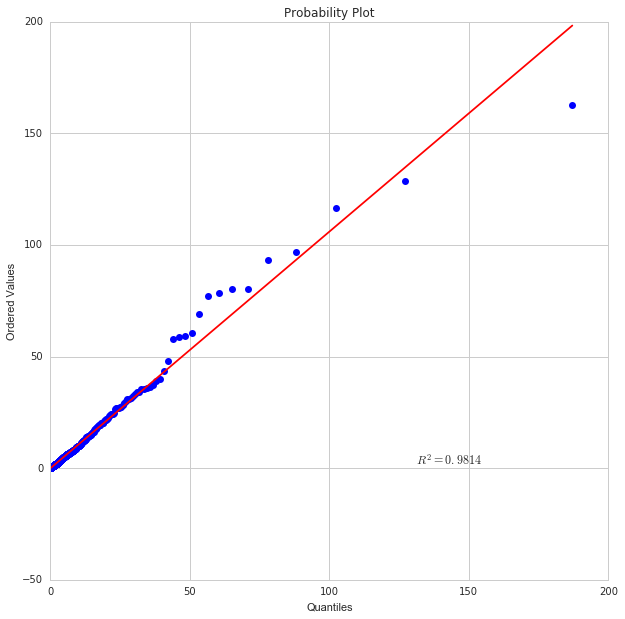

(2.6802808756665124, 2.5201694194552307, 0.004685787093120548, 1.6746142348932569)


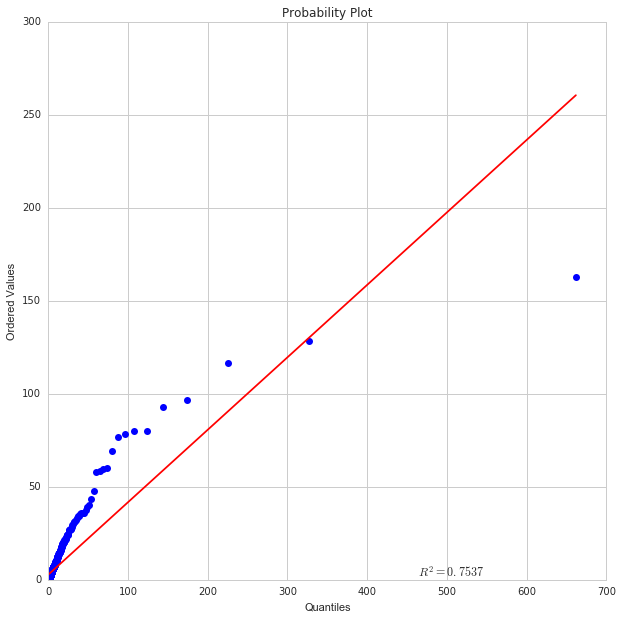

In [11]:
from scipy import stats
import matplotlib.pyplot as plt

params = stats.genextreme.fit(sample)
print(params)
fig = plt.figure(8, figsize=(10, 10))
ax = fig.add_subplot(111)
res = stats.probplot(sample, dist=stats.genextreme, sparams=params, plot=ax)
plt.show()

from scipy import stats
import matplotlib.pyplot as plt

params = stats.lognorm.fit(sample)
print(params)
fig = plt.figure(8, figsize=(10, 10))
ax = fig.add_subplot(111)
res = stats.probplot(sample, dist=stats.lognorm, sparams=params, plot=ax)
plt.show()

from scipy import stats
import matplotlib.pyplot as plt

params = stats.f.fit(sample)
print(params)
fig = plt.figure(8, figsize=(10, 10))
ax = fig.add_subplot(111)
res = stats.probplot(sample, dist=stats.f, sparams=params, plot=ax)
plt.show()

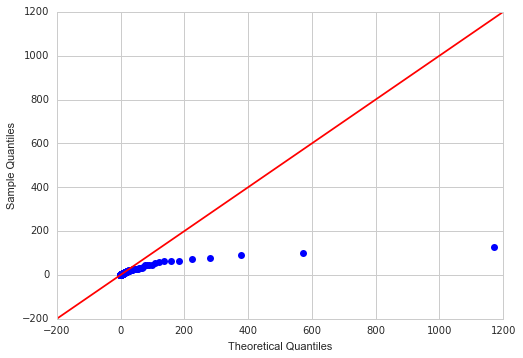

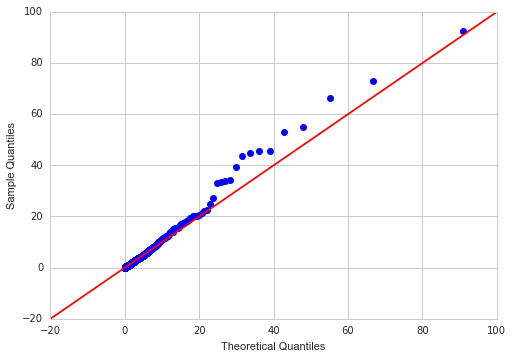

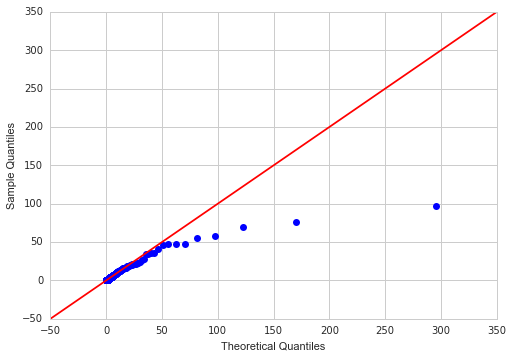

In [13]:
import statsmodels.api as sm

fig = sm.qqplot(sample, stats.genextreme, fit=True, line='45')
plt.show()

fig = sm.qqplot(sample, stats.lognorm, fit=True, line='45')
plt.show()

fig = sm.qqplot(sample, stats.f, fit=True, line='45')
plt.show()

In [16]:
# Computes the Kolmogorov-Smirnov statistic on 2 samples.

#     This is a two-sided test for the null hypothesis that 2 independent samples
#     are drawn from the same continuous distribution.

#     If the K-S statistic is small or the p-value is high, then we cannot
#     reject the hypothesis that the distributions of the two samples
#     are the same.
    
params = stats.genextreme.fit(sample)
dist =   stats.genextreme.rvs(size=sample.__sizeof__(),*params)
res = stats.ks_2samp(sample, dist)
print(res)

params = stats.lognorm.fit(sample)
dist = stats.lognorm.rvs(size=sample.__sizeof__(),*params)
res = stats.ks_2samp(sample, dist)
print(res)

params = stats.f.fit(sample)
dist =   stats.f.rvs(size=sample.__sizeof__(),*params)
res = stats.ks_2samp(sample, dist)
print(res)

Ks_2sampResult(statistic=0.023489130434782624, pvalue=0.70510450751512455)
Ks_2sampResult(statistic=0.021975296442687697, pvalue=0.77900360752771591)
Ks_2sampResult(statistic=0.032808300395256951, pvalue=0.2888307150021624)
